In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/R1 - respuestas conocimiento bajo.csv', header = None)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.columns = ['ID', 'R1', "Conocimiento"]

ValueError: ignored

In [ ]:
texts = df['R1'].copy()
texts = [text.lower() for text in texts ]
texts = [text.split() for text in texts ]
texts = [[word.strip() for word in text] for text in texts]
texts = [[word for word in text if word not in stop_words ] for text in texts]

In [ ]:
df["words"] = texts

In [ ]:
df

,ID,R1,Conocimiento,words
0,1,sirve para prevenir el peligro que presenta un...,1,"[sirve, prevenir, peligro, presenta, situación..."
1,2,solo sirve para causar problemas y preocupaci...,1,"[solo, sirve, causar, problemas, preocupación,..."
2,3,ayuda a prepararse para situaciones desagrada...,1,"[ayuda, prepararse, situaciones, desagradables..."
3,4,"dificulta tu día a día y te hace sentir mal, ...",1,"[dificulta, día, día, hace, sentir, mal,, pued..."
4,5,algo desagradable que no sirve para nada y so...,1,"[desagradable, sirve, solo, causa, malestar.]"
...,...,...,...,...
95,96,una respuesta a un estímulo elicitante real o...,3,"[respuesta, estímulo, elicitante, real, antici..."
96,97,una respuesta del organismo al estrés y la am...,3,"[respuesta, organismo, estrés, amenaza,, gener..."
97,98,una respuesta fisiológica que nuestro organis...,3,"[respuesta, fisiológica, organismo, produce, e..."
98,99,una respuesta fisiológica generada por los es...,3,"[respuesta, fisiológica, generada, estímulos, ..."


In [ ]:
grupo1 = df[df['Conocimiento'] == 1]

In [ ]:
text = ' '.join(grupo1['words'].sum())

In [ ]:
text

'sirve prevenir peligro presenta situación futura prepara evitar daños, generando malestares sensación falta aire respirar, desorganización situación rutinaria insomnio. solo sirve causar problemas preocupación, siempre preocupado. ayuda prepararse situaciones desagradables. aún así, enfermedad causa desorganización vida cotidiana malestar físico insomnio. dificulta día día hace sentir mal, puede llevar situaciones insomnio desajuste vida cotidiana. desagradable sirve solo causa malestar. solo sirve darle preocupación individuo. genera situaciones desagradables sensaciones insomnio falta aire respirar. sirve hacer persona caiga constante preocupación capaz encontrar solución. mala cosa hace sufrir, causa nervios cansancios. hace sentir mal, provoca insomnio falta aire respiramos. malo, ayuda personas ninguna situación. hace darte problemas poder dormir desorganizarse. funciones generar malestar estrés individuo. sé, sé problema personas, provoca problemas salud puede causar problemas f

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

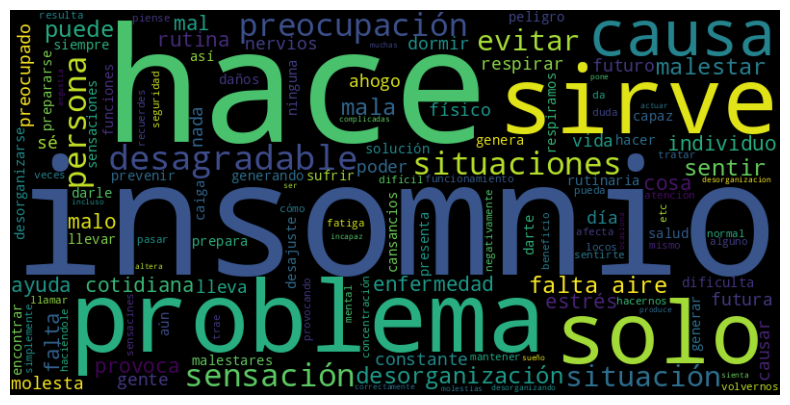

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

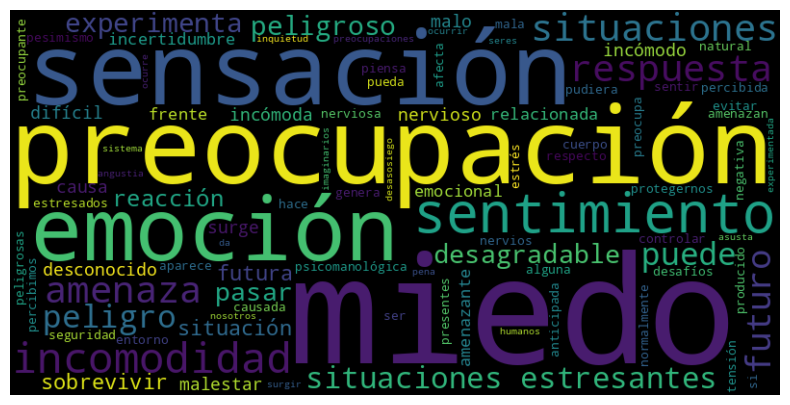

In [ ]:
grupo2 = df[df['Conocimiento'] == 2]
text = ' '.join(grupo2['words'].sum())
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

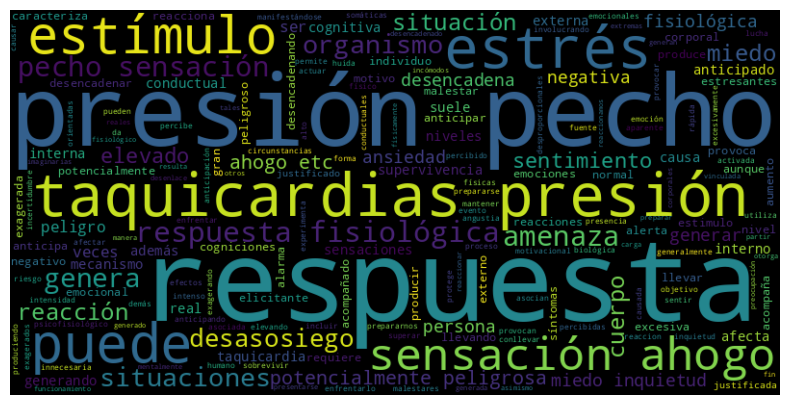

In [ ]:
grupo3 = df[df['Conocimiento'] == 3]
text = ' '.join(grupo3['words'].sum())
wordcloud = WordCloud(width=800, height=400).generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def preprocess_input(df, max_seq_len=None):
  texts = df['R1'].copy()
  labels = df['Conocimiento'].copy()

  stop_words = stopwords.words('spanish')

  texts = [text.lower() for text in texts ]
  texts = [text.split() for text in texts ]
  texts = [[word.strip() for word in text] for text in texts]
  texts = [[word for word in text if word not in stop_words ] for text in texts]

  vocab_length = 10000

  tokenizer = Tokenizer(num_words=vocab_length)
  tokenizer.fit_on_texts(texts)
  texts = tokenizer.texts_to_sequences(texts)

  if max_seq_len is None:
    max_seq_len = np.max([len(text) for text in texts])

  texts = pad_sequences(texts, maxlen=max_seq_len, padding='post')

  labels = np.array(labels)

  return texts, labels, max_seq_len, vocab_length, labels

In [ ]:
texts, labels, max_seq_len, vocab_lenght, label_mapping = preprocess_input(df, 22)

In [ ]:
print("Frases en el texto:\n", texts.shape)
print("\nEtiquetas:\n", labels.shape)
print("\nLongitud maxima de cada frase:\n", max_seq_len)
print("\nLongitud maxima de vocabulario:\n", vocab_lenght)
print("\nLabel mapping:\n", label_mapping)

Frases en el texto:
 (100, 22)

Etiquetas:
 (100,)

Longitud maxima de cada frase:
 22

Longitud maxima de vocabulario:
 10000

Label mapping:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
encoded_labels = np.zeros((len(labels), 3))  # Crear un array de ceros de forma (n, 3)

# Codificar los valores manualmente
for i, label in enumerate(labels):
    encoded_labels[i, label-1] = 1

In [ ]:
labels = encoded_labels

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [ ]:
texts_train, texts_test, labels_train, labels_test = train_test_split(texts, labels, train_size=0.7, random_state=220)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_lenght, output_dim=512, input_length=max_seq_len))
model.add(LSTM(units=128))
model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
    texts_train,
    labels_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 4)

Epoch 1/4
2/2 [==============================] - 7s 1s/step - loss: 1.0626 - accuracy: 0.6071 - val_loss: 0.9759 - val_accuracy: 0.5000
Epoch 2/4
2/2 [==============================] - 0s 227ms/step - loss: 0.9162 - accuracy: 0.6964 - val_loss: 0.8890 - val_accuracy: 0.5000
Epoch 3/4
2/2 [==============================] - 0s 184ms/step - loss: 0.8041 - accuracy: 0.6964 - val_loss: 0.8840 - val_accuracy: 0.5714
Epoch 4/4
2/2 [==============================] - 0s 189ms/step - loss: 0.7440 - accuracy: 0.7143 - val_loss: 0.8588 - val_accuracy: 0.5714


In [ ]:
model.evaluate(texts_test, labels_test)

1/1 [==============================] - 0s 74ms/step - loss: 0.5918 - accuracy: 0.7000


[0.5917686820030212, 0.699999988079071]

In [1]:
embedding_dim = 512
inputs = tf.keras.Input(shape = (max_seq_len,))
embedding = tf.keras.layers.Embedding(
    input_dim = vocab_lenght,
    output_dim = embedding_dim,
    input_length = max_seq_len
)(inputs)


gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(
    units = 256,
    return_sequences = True
))(embedding)

flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(flatten)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = [
               'accuracy',
               tf.keras.metrics.AUC(name = 'auc')

    ]
)




hisotory = model.fit(
    texts_train,
    labels_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 5


)

NameError: ignored

In [ ]:
model.evaluate(texts_test, labels_test)

1/1 [==============================] - 0s 108ms/step - loss: 0.5701 - accuracy: 0.8000 - auc: 0.9303


[0.5701398253440857, 0.800000011920929, 0.9302778244018555]

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_lenght, output_dim=embedding_dim, input_length=max_seq_len))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))  # Regularización mediante Dropout
model.add(LSTM(units=64))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(texts_train, labels_train, epochs=10, batch_size=32)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(texts_test, labels_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Epoch 1/5
3/3 [==============================] - 6s 379ms/step - loss: 1.0614 - accuracy: 0.2714
Epoch 2/5
3/3 [==============================] - 1s 311ms/step - loss: 0.8898 - accuracy: 0.6857
Epoch 3/5
3/3 [==============================] - 1s 307ms/step - loss: 0.7489 - accuracy: 0.7143
Epoch 4/5
3/3 [==============================] - 1s 199ms/step - loss: 0.6831 - accuracy: 0.7429
Epoch 5/5
1/1 [==============================] - 1s 1s/step - loss: 0.6037 - accuracy: 0.7000
Test Loss: 0.6036758422851562
Test Accuracy: 0.699999988079071


In [ ]:
dfcuestionario = pd.read_csv('/content/Respuestascuestionario1 - Hoja 1.csv', header = None)

In [ ]:
dfcuestionario.columns = ['ID', 'R1', "Conocimiento"]

In [ ]:
textscuestionario, labelscuestionario, max_seq_lenc, vocab_lenghtc, label_mappingc = preprocess_input(dfcuestionario)

In [ ]:
print("Frases en el texto:\n", textscuestionario.shape)
print("\nEtiquetas:\n", labelscuestionario.shape)
print("\nLongitud maxima de cada frase:\n", max_seq_lenc)
print("\nLongitud maxima de vocabulario:\n", vocab_lenghtc)
print("\nLabel mapping:\n", label_mappingc)

Frases en el texto:
 (15, 22)

Etiquetas:
 (15,)

Longitud maxima de cada frase:
 22

Longitud maxima de vocabulario:
 10000

Label mapping:
 [2 2 2 1 1 2 1 1 3 1 3 1 2 3 3]


In [ ]:
preds = model.predict(textscuestionario)

1/1 [==============================] - 1s 893ms/step


In [ ]:
predicciones = []
for x in preds:
  p1 = np.argmax(x)
  predicciones.append(p1)

In [ ]:
predicciones

[1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1]

In [ ]:
labesc = labelscuestionario -1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_true = labesc, y_pred = predicciones)

0.4

In [ ]:
resultados

In [ ]:
datosmodelo = pd.DataFrame({"predicciones": predicciones, "resultados": labesc})

In [ ]:
datosmodelo

,predicciones,resultados
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
5,2,1
6,1,0
7,1,0
8,2,2
9,1,0


In [ ]:
dfcuestionario

,ID,R1,Conocimiento
0,0,Es un sentimiento de miedo o incomodidad ante ...,2
1,1,Sentimiento que sufre nuestro cuerpo tras una ...,2
2,2,Sentimiento de estrés mantenido en el tiempo q...,2
3,3,"La sensación de agobio, falta de claridad y ac...",1
4,4,Un sentimiento de ahogamiento dentro de ti que...,1
5,5,Trastorno de miedo o inquietud generado por ci...,2
6,6,Un trastorno mental que se activa en ciertas s...,1
7,7,Es pensamiento de incomodidad que puede crear ...,1
8,8,Es una respuesta del organismo ante una amenaz...,3
9,9,Descontrol emocional provocado por una situaci...,1
